In [1]:
from google.colab import files
uploaded = files.upload()


Saving Zoo.csv to Zoo.csv


In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [11]:
Zoodata = pd.read_csv('Zoo.csv')


In [12]:
Zoodata.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [13]:
Zoodata.shape

(101, 18)

In [14]:
Zoodata.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [15]:
Zoodata.dtypes

animal name    object
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
type            int64
dtype: object

(array([41., 20.,  0.,  5.,  0., 13.,  4.,  0.,  8., 10.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <BarContainer object of 10 artists>)

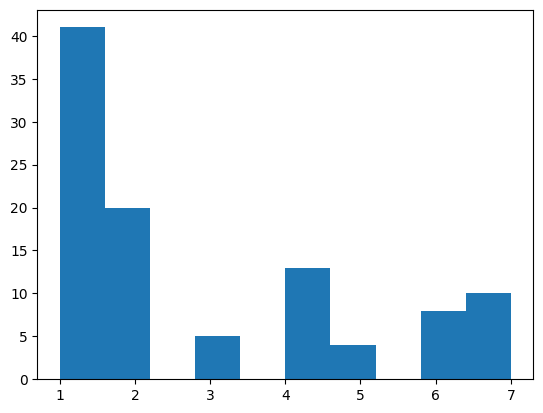

In [20]:
plt.hist(Zoodata['type'])

<Axes: >

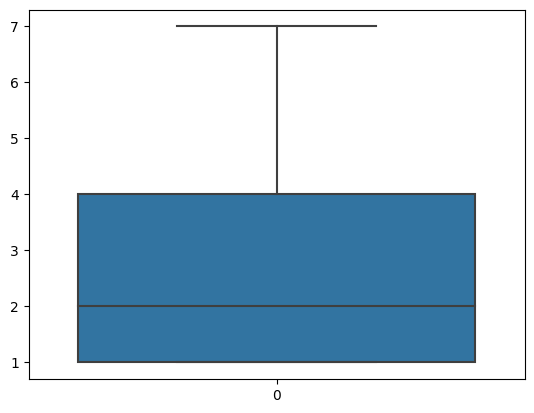

In [21]:
sns.boxplot(Zoodata['type'])

<ipython-input-23-a5e7087c8f85>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Zoodata.corr(), annot =True)


<Axes: >

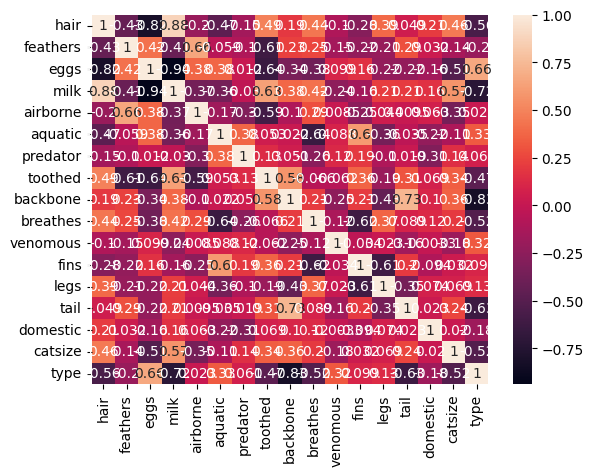

In [23]:
sns.heatmap(Zoodata.corr(), annot =True)

In [28]:
Zoodata['animal name'].unique()

array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',
       

In [30]:
colname=[]
for x in Zoodata.columns:
    if Zoodata[x].dtypes=='object':
        colname.append(x)
colname        


['animal name']

In [32]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for x in colname:
    Zoodata[x]=le.fit_transform(Zoodata[x])
    
    
    le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print('Feature', x)
    print('mapping', le_name_mapping)

Feature animal name
mapping {'aardvark': 0, 'antelope': 1, 'bass': 2, 'bear': 3, 'boar': 4, 'buffalo': 5, 'calf': 6, 'carp': 7, 'catfish': 8, 'cavy': 9, 'cheetah': 10, 'chicken': 11, 'chub': 12, 'clam': 13, 'crab': 14, 'crayfish': 15, 'crow': 16, 'deer': 17, 'dogfish': 18, 'dolphin': 19, 'dove': 20, 'duck': 21, 'elephant': 22, 'flamingo': 23, 'flea': 24, 'frog': 25, 'fruitbat': 26, 'giraffe': 27, 'girl': 28, 'gnat': 29, 'goat': 30, 'gorilla': 31, 'gull': 32, 'haddock': 33, 'hamster': 34, 'hare': 35, 'hawk': 36, 'herring': 37, 'honeybee': 38, 'housefly': 39, 'kiwi': 40, 'ladybird': 41, 'lark': 42, 'leopard': 43, 'lion': 44, 'lobster': 45, 'lynx': 46, 'mink': 47, 'mole': 48, 'mongoose': 49, 'moth': 50, 'newt': 51, 'octopus': 52, 'opossum': 53, 'oryx': 54, 'ostrich': 55, 'parakeet': 56, 'penguin': 57, 'pheasant': 58, 'pike': 59, 'piranha': 60, 'pitviper': 61, 'platypus': 62, 'polecat': 63, 'pony': 64, 'porpoise': 65, 'puma': 66, 'pussycat': 67, 'raccoon': 68, 'reindeer': 69, 'rhea': 70, '

In [33]:
Zoodata.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [35]:
# Separating the features and target variable
X = Zoodata.drop('type', axis=1)
y = Zoodata['type']


In [36]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(X)
X = scaler.transform(X)



In [39]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [40]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))),
                              metric='euclidean')

In [41]:
model_KNN.fit(X_train,Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=8)

In [42]:
Y_pred=model_KNN.predict(X_test)
print(list(zip(Y_test,Y_pred)))

[(2, 2), (1, 1), (7, 7), (6, 6), (4, 4), (1, 1), (1, 1), (1, 1), (3, 2), (7, 7), (2, 2), (4, 4), (1, 1), (6, 6), (4, 4), (1, 1), (5, 3), (2, 2), (1, 1), (4, 4), (7, 6)]


In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)
from sklearn.metrics import classification_report



[[7 0 0 0 0 0 0]
 [0 3 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 4 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 1 2]]
Classification report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       0.75      1.00      0.86         3
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         4
           5       0.00      0.00      0.00         1
           6       0.67      1.00      0.80         2
           7       1.00      0.67      0.80         3

    accuracy                           0.86        21
   macro avg       0.63      0.67      0.64        21
weighted avg       0.84      0.86      0.84        21

Accuracy of the model:  0.8571428571428571


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report:")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc)
from sklearn.metrics import classification_report



[[7 0 0 0 0 0 0]
 [0 3 0 0 0 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 4 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 1 2]]
Classification report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       0.75      1.00      0.86         3
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         4
           5       0.00      0.00      0.00         1
           6       0.67      1.00      0.80         2
           7       1.00      0.67      0.80         3

    accuracy                           0.86        21
   macro avg       0.63      0.67      0.64        21
weighted avg       0.84      0.86      0.84        21

Accuracy of the model:  0.8571428571428571


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
from sklearn.metrics import classification_report

# Replace y_pred and y_test with your actual predictions and test labels
report = classification_report(Y_test, Y_pred, zero_division=1)

print(report)


              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       0.75      1.00      0.86         3
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         4
           5       1.00      0.00      0.00         1
           6       0.67      1.00      0.80         2
           7       1.00      0.67      0.80         3

    accuracy                           0.86        21
   macro avg       0.77      0.67      0.64        21
weighted avg       0.88      0.86      0.84        21

